# Linear Models

In [7]:
import statsmodels.api as S
import pandas
import numpy as N
import tqdm
import matplotlib.pyplot as pyplot
import seaborn
from pathlib import Path

seaborn.set_style('whitegrid')

In [8]:
dfAll = pandas.read_csv(r'C:\Users\Administrator\Desktop\data.csv')
dfAll

,BOROUGH,year,real price,category,Crimes_1,Crimes_2,Crimes_3,Crimes_4
0,Manhattan,2014,179552.175750,Coop Apartment,2,4,5,4
1,Manhattan,2014,116180.819603,Coop Apartment,2,4,5,4
2,Manhattan,2014,148711.449092,Coop Apartment,2,4,5,4
3,Manhattan,2014,316687.790452,Coop Apartment,2,4,5,4
4,Manhattan,2014,73933.248838,Coop Apartment,2,4,5,4
...,...,...,...,...,...,...,...,...
271705,Manhattan,2011,151178.301467,Condo Apartment,4,25,15,4
271706,Manhattan,2011,204242.774566,Condo Apartment,4,25,15,4
271707,Manhattan,2011,142023.121387,Condo Apartment,4,25,15,4
271708,Manhattan,2011,171216.985327,Condo Apartment,4,25,15,4


# One-Hot encode data and add constant

In [9]:
dfOneHotBorough = pandas.get_dummies(dfAll['BOROUGH'])
dfOneHotCategory = pandas.get_dummies(dfAll['category'])
df = dfAll.drop('BOROUGH', axis=1).join(dfOneHotBorough).drop('category', axis=1).join(dfOneHotCategory)
df['year'] = df['year'] - 2000
dfTrain = df[df['year'] <= 13]#.drop('year',axis=1)
dfTest = df[df['year'] > 13]#.drop('year',axis=1)
df

,year,real price,Crimes_1,Crimes_2,Crimes_3,Crimes_4,Bronx,Brooklyn,Manhattan,Queens,Staten Island,1 Family Dwelling,2 Family Dwelling,Condo Apartment,Coop Apartment
0,14,179552.175750,2,4,5,4,0,0,1,0,0,0,0,0,1
1,14,116180.819603,2,4,5,4,0,0,1,0,0,0,0,0,1
2,14,148711.449092,2,4,5,4,0,0,1,0,0,0,0,0,1
3,14,316687.790452,2,4,5,4,0,0,1,0,0,0,0,0,1
4,14,73933.248838,2,4,5,4,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271705,11,151178.301467,4,25,15,4,0,0,1,0,0,0,0,1,0
271706,11,204242.774566,4,25,15,4,0,0,1,0,0,0,0,1,0
271707,11,142023.121387,4,25,15,4,0,0,1,0,0,0,0,1,0
271708,11,171216.985327,4,25,15,4,0,0,1,0,0,0,0,1,0


## Train Linear Model

In [10]:
dfTrain1 = S.add_constant(dfTrain)
dfX = dfTrain1.loc[:, dfTrain1.columns != 'real price']
dfY = dfTrain1[['real price']]
model = S.OLS(dfY, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             real price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1223.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        05:44:15   Log-Likelihood:            -2.7692e+06
No. Observations:              183875   AIC:                         5.538e+06
Df Residuals:                  183862   BIC:                         5.539e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.879e+05   1.11e+0

In [5]:
c=N.array(result.params)
c=c.tolist()
a=df.columns.drop(['real price']).insert(0,'constant')
b=[15.11,15.15,-5.17,-2.18,-3.61,-5.90,-16.72,6.10,110.75,-31.04,-30.96,22.39,25.39,19.94,-39.28]
p=[0,0,0,0.029,0,0,0,0,0,0,0,0,0,0,0]
dd=pandas.DataFrame([a,c,b,p],['variable','coef','t','p'])
dd=dd.transpose()
dd.to_excel(r'C:\Users\Administrator\Desktop\formula2.xlsx')

In [6]:
cc=[str(i) for i in c]
formula='+'.join(cc+a)
formula

'118001.8333079302constant+13658.430844285394year+-1710.204423507841Crimes_1+-747.9352314930443Crimes_2+-1149.0782479999687Crimes_3+-1379.8110523213948Crimes_4+-101302.66951124532Bronx+24987.547150986968Brooklyn+474976.92532132455Manhattan+-106420.981452973Queens+-174238.98820015925Staten Island+87180.783022285161 Family Dwelling+101802.936447733212 Family Dwelling+78253.01694989714Condo Apartment+-149234.9031120239Coop Apartment'

In [11]:
testX1=S.add_constant(dfTest)
testX = testX1.loc[:, testX1.columns != 'real price']
testY=N.array(testX1[['real price']])
pre=N.array(result.predict(testX).reset_index().drop(['index'],axis=1))
mse=((testY-pre)**2).sum()/len(testY)
rmse=mse**0.5
rmse

993658.7997971993

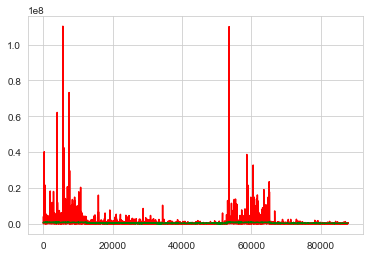

In [12]:
import matplotlib.pyplot as plt
plt.plot(testY,color='r',label='real')
plt.plot(pre,color='g',label='predict')
plt.show()